## **Skydiving in existance of friction** 

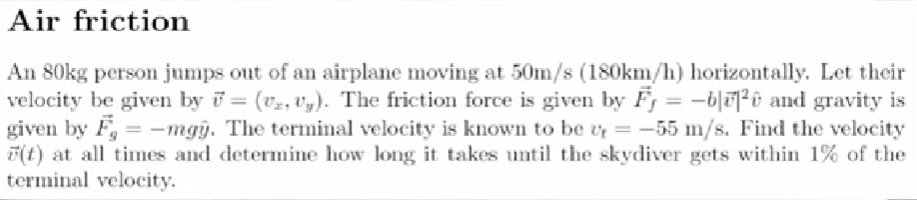

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import integrate

The needed to be solved equations in a skydiving problem

$\frac{dv_y}{dt} = - g -\frac{b}{m}\sqrt{v_x^2 + v_y^2} \cdot v_y$

$\frac{dv_x}{dt} = -\frac{b}{m}\sqrt{v_x^2 + v_y^2} \cdot v_x$

$\vec{S} = (v_x, v_y)$

In [2]:
# Define the equation of motion
def dSdt(S, t, g, m, b):
    vx = S[0]
    vy = S[1]
    return [ #this will return a vector containing const.s b (friction constant), m (mass), g (gravity)
    -b/m * np.sqrt(vx**2+vy**2) * vx, #dvx/dt
    -g - b/m * np.sqrt(vx**2+vy**2) * vy #dvy/dt
    ]


To get b:

at terminal velocity: the upward force = downward force


In [3]:
import sympy as smp
g, vx, vy, m, b, s = smp.symbols('g v_x v_y m b s')
# at Upward force = Downward force ----> mg = m*friction(y component)
vt = -55
s = vt
equ1 = smp.Eq(-g-(b/m)*s*vy, 0)
equ2 = smp.Eq(m*g, 0)
from sympy.solvers import solve
solution_b = solve((equ1,equ1), b)
print(solution_b)
# at terminal vy only exists and equal to vt
# so b is
b = g*m/vt**2
print(b)

{b: g*m/(55*v_y)}
g*m/3025


In [4]:
#initial condetions
t= np.linspace(0, 20 ,100)
m = 80
g = 9.81
b = g*m/vt**2
v0x, v0y = 50, 0
#solution using differential equations
sol = integrate.odeint(dSdt, y0=[v0x, v0y], t=t, args=(g, m, b))
sol

array([[ 50.        ,   0.        ],
       [ 48.4136722 ,  -1.9503758 ],
       [ 46.92251143,  -3.84158835],
       [ 45.51576815,  -5.67850589],
       [ 44.18400832,  -7.46515092],
       [ 42.91893325,  -9.20481567],
       [ 41.71323236, -10.90016142],
       [ 40.56046274, -12.55330491],
       [ 39.45494809, -14.16589541],
       [ 38.39169442, -15.73918379],
       [ 37.36631783, -17.27408526],
       [ 36.37498198, -18.77123662],
       [ 35.41434295, -20.23104872],
       [ 34.48149978, -21.65375419],
       [ 33.57394977, -23.03945071],
       [ 32.68954736, -24.38813984],
       [ 31.8264662 , -25.69976151],
       [ 30.98316393, -26.97422406],
       [ 30.15834945, -28.21143014],
       [ 29.35095247, -29.4112985 ],
       [ 28.5600955 , -30.57378167],
       [ 27.7850677 , -31.69888042],
       [ 27.02530123, -32.7866543 ],
       [ 26.28034944, -33.83722972],
       [ 25.54986731, -34.85080487],
       [ 24.83359377, -35.82765237],
       [ 24.13133591, -36.76812017],
 

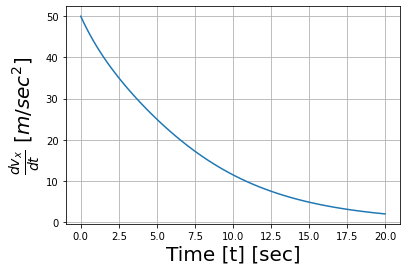

In [5]:
vx = sol.T[0]
vy = sol.T[1]
plt.plot(t, vx)
plt.xlabel(r'Time [t] [sec]', fontsize = 20)
plt.ylabel(r'$\frac{dv_x}{dt}$ [$m/sec^2$]', fontsize = 20)
plt.grid()
plt.show()

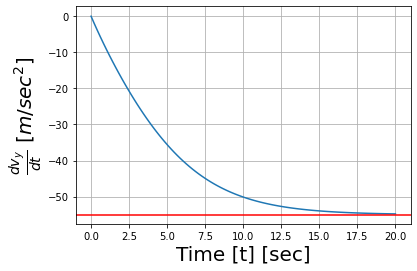

In [6]:
plt.plot(t, vy)
plt.axhline(vt, color='r')
plt.xlabel(r'Time [t] [sec]', fontsize = 20)
plt.ylabel(r'$\frac{dv_y}{dt}$ [$m/sec^2$]', fontsize = 20)
plt.grid()
plt.show()

**How long will it take the plane to reach 0.01 of the termainal velocity?**

In [7]:
print(t[np.abs(vy - vt)/np.abs(vt) < 0.01][0], 'secs')

17.171717171717173 secs
